In [1]:
#importing numpy and pandas
import numpy as np
import pandas as pd

In [2]:
#reading data

auto=pd.read_csv('Automobile.csv')

In [3]:
#finding missing values in dataset
print("Missing values before:\n", auto.isna().sum())

Missing values before:
 symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64


In [4]:
auto.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Compute descriptive statistics
print("Descriptive statistics:\n", auto.describe())

Descriptive statistics:
         symboling  normalized_losses  wheel_base      length       width  \
count  201.000000         201.000000  201.000000  201.000000  201.000000   
mean     0.840796         125.189055   98.797015  174.200995   65.889055   
std      1.254802          33.572966    6.066366   12.322175    2.101471   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.800000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.500000   66.600000   
max      3.000000         256.000000  120.900000  208.100000   72.000000   

           height  curb_weight  engine_size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  201.000000   
mean    53.766667  2555.666667   126.875622    3.329701    3.261741   
std      2.447822   517.296727    41.546834    0.268166    0.317875   
min   

In [6]:
#importing libraries for Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


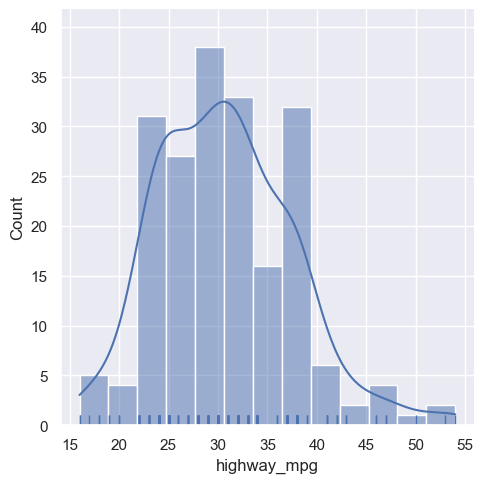

In [7]:
#Visualising the dataset 
sns.displot(auto['highway_mpg'],rug=True,kde=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


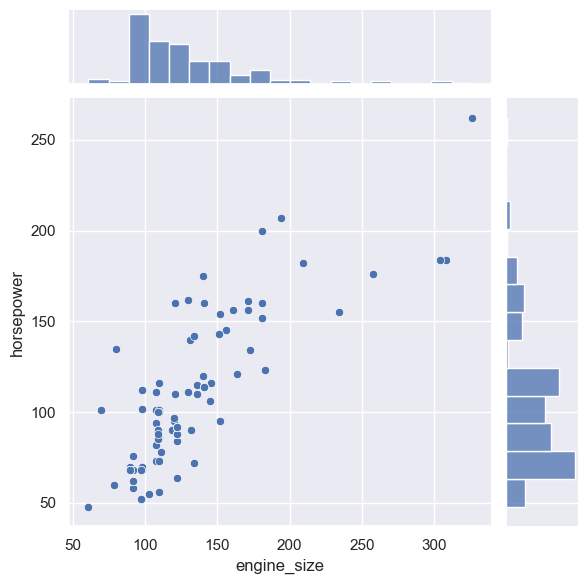

In [8]:
sns.jointplot(auto['engine_size'],auto['horsepower'])

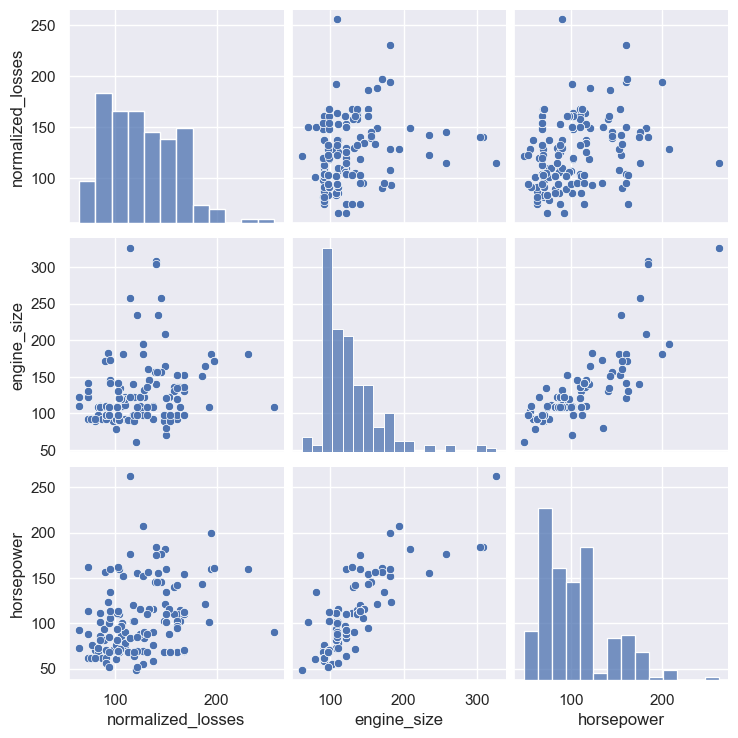

In [9]:
#partwise plot: It creats a matrix of axes and shows the relationship
#It also draws histogram of each variable onthe diagonal axis

sns.pairplot(auto[['normalized_losses','engine_size','horsepower']])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='horsepower'>

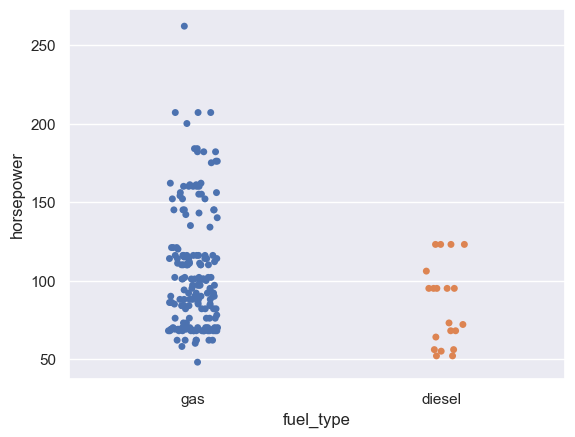

In [10]:
sns.stripplot(auto['fuel_type'],auto['horsepower'],jitter=True)
#jitter is used to see micro version of data (data of every element in data set)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_doors', ylabel='horsepower'>

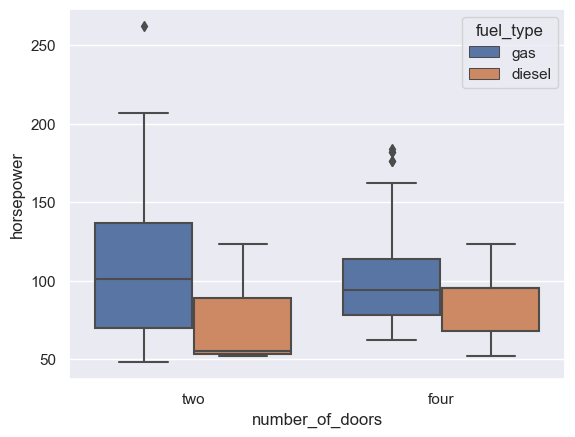

In [11]:
sns.boxplot(auto['number_of_doors'],auto['horsepower'],hue=auto['fuel_type'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_style', ylabel='horsepower'>

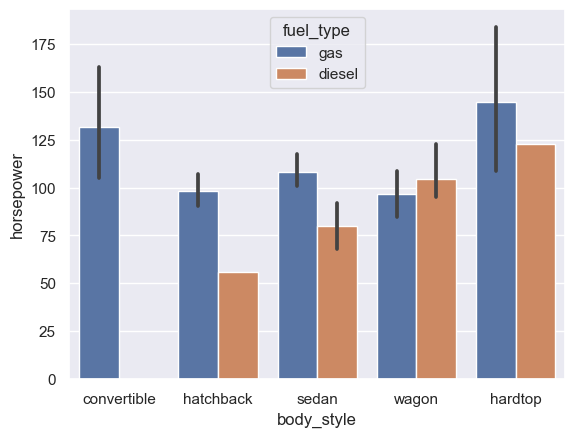

In [12]:
sns.barplot(auto['body_style'],auto['horsepower'],hue=auto['fuel_type'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_style', ylabel='count'>

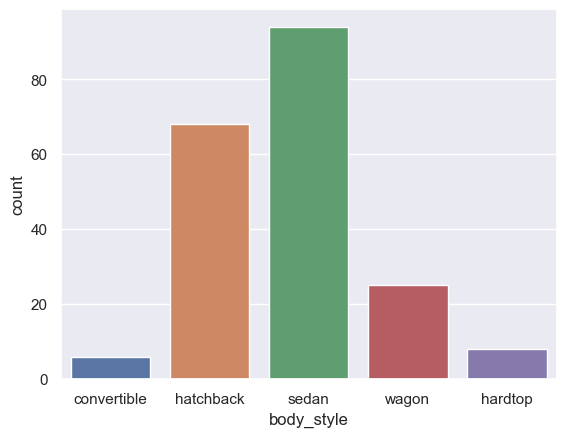

In [13]:
sns.countplot(auto['body_style'])

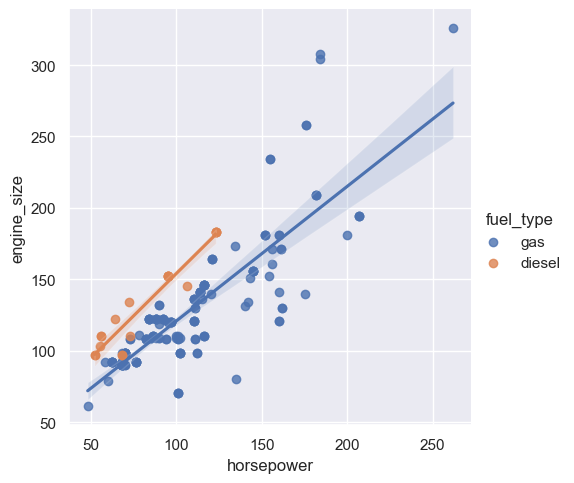

In [14]:
#linear regression plot
sns.lmplot(x='horsepower',y='engine_size',data=auto,hue='fuel_type')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


In [16]:
# Create a k-means object with the desired number of clusters
kmeans = KMeans(n_clusters=5)


In [17]:
# Fit the k-means object to the data
kmeans.fit(auto[['wheel_base','engine_size','stroke','horsepower','peak_rpm','city_mpg','highway_mpg','price']])

KMeans(n_clusters=5)

In [18]:
# Get the cluster labels for each data point
labels = kmeans.labels_


In [19]:
# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

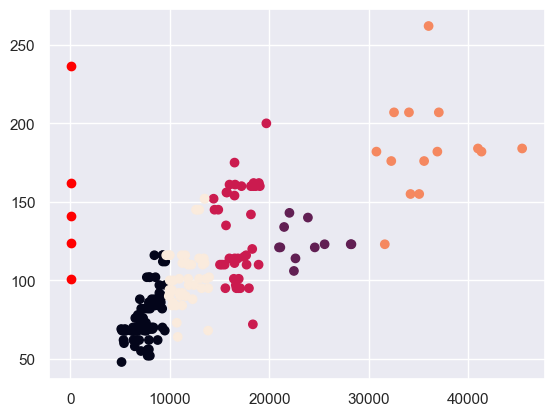

In [20]:
# Visualize the clusters
plt.scatter(auto['price'],auto['horsepower'],c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o')
plt.show()

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(auto.drop('price', axis=1), auto['price'], test_size=0.2, random_state=42)


In [22]:
# Define the target variable that you want to predict
target_variable = 'price'


In [23]:
# Select the features that you want to use for the prediction
features = ['wheel_base','engine_size','stroke','horsepower','peak_rpm','city_mpg','highway_mpg']

In [24]:
# Preprocess the data by scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])
from sklearn.linear_model import LinearRegression

In [25]:
# Choose a machine learning algorithm to train on the data
model = LinearRegression()


In [26]:
# Train the model on the training data
model.fit(X_train[features], y_train)

LinearRegression()

In [27]:
# Evaluate the model on the testing data using mean squared error
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test[features])
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 29892716.644965667


In [28]:
# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'wheel_base':[88.6],'engine_size':[130],'stroke':[2.68],'horsepower':[111],'peak_rpm':[5000],'city_mpg':[21],'highway_mpg':[27]})
new_data[features] = scaler.transform(new_data[features])
prediction = model.predict(new_data[features])
print('Prediction:', prediction)

Prediction: [11724.26315465]


In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
# Evaluate the accuracy of the model using MAE, MSE, RMSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the accuracy metrics
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)


MAE:  3897.4162885495502
MSE:  29892716.644965667
RMSE:  5467.423218021966
R-squared:  0.7556722102939121


array([11724.26315465])